## 1. Import Library

In [2]:
import tensorflow as tf
import pandas as pd
import datetime
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, roc_auc_score, auc, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

## 2. Preprocessing Data

In [3]:
train_path='Dataset/train/'
test_path='Dataset/test/'
num_classes=3

In [4]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(244,244), 
                                                                     color_mode='rgb', batch_size=30, shuffle=True)

Found 390 images belonging to 3 classes.


## 3. Create The Model

In [5]:
model=VGG16(weights='imagenet', include_top=True)
model.layers.pop()
new_layer=Dense(num_classes, activation='softmax', name='prediction_1')
model=Model(model.input, new_layer(model.layers[-1].output))



553467096/553467096 [==============================] - 178s 0us/step


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 4. Training The Model

In [7]:
sgd=tf.keras.optimizers.legacy.SGD(lr=0.0001, decay=0.0001)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\keras\src\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
            self.model.stop_training=True

stopTraining=Callback()

In [9]:
history=model.fit_generator(train_batches, epochs=10, verbose=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4648\2803618879.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_batches, epochs=10, verbose=1)


Epoch 1/10


13/13 [==============================] - 580s 43s/step - loss: 1.0973 - accuracy: 0.4462
Epoch 2/10
13/13 [==============================] - 517s 40s/step - loss: 1.0973 - accuracy: 0.4487
Epoch 3/10
13/13 [==============================] - 513s 40s/step - loss: 1.0973 - accuracy: 0.4462
Epoch 4/10
13/13 [==============================] - 500s 38s/step - loss: 1.0973 - accuracy: 0.4513
Epoch 5/10
13/13 [==============================] - 503s 39s/step - loss: 1.0973 - accuracy: 0.4487
Epoch 6/10
13/13 [==============================] - 517s 40s/step - loss: 1.0973 - accuracy: 0.4487
Epoch 7/10
13/13 [==============================] - 489s 37s/step - loss: 1.0972 - accuracy: 0.4590
Epoch 8/10
13/13 [==============================] - 527s 40s/step - loss: 1.0972 - accuracy: 0.4590
Epoch 9/10
13/13 [==============================] - 505s 39s/step - loss: 1.0972 - accuracy: 0.4590
Epoch 10/10
13/13 [==============================] - 607s 47s/step - loss: 1.0972 - accuracy: 0.46

## 5. Prediksi Data Uji

In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_path, batch_size=64, shuffle=False, target_size=(224,224))
predicts_vectors=model.predict_generator(test_generator, verbose=1)

Found 150 images belonging to 3 classes.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4648\3610195978.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicts_vectors=model.predict_generator(test_generator, verbose=1)


3/3 [==============================] - 69s 12s/step


In [11]:
pred=np.argmax(predicts_vectors, axis=1)

## 6. Validasi Hasil Prediksi Data Uji

In [12]:

lb=LabelBinarizer()
lb.fit(test_generator.labels)

y_test=lb.transform(test_generator.labels)
y_pred=lb.transform(pred)

auc_score=roc_auc_score(y_test, y_pred, average="macro")

In [13]:
y_true=test_generator.labels
y_pred=pred

recall=recall_score(y_true, y_pred, average='macro')
precision=precision_score(y_true, y_pred, average='macro')
f1=f1_score(y_true, y_pred, average='macro')
kappa=cohen_kappa_score(test_generator.labels, pred)
acc=accuracy_score(test_generator.labels, pred)

c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 2
 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 2 2 2 2
 2 2]


## Evaluation

In [16]:
print('>>>> RESULT <<<<')
print('Accuracy: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Score: {}'.format(f1))
print('AUC: {}'.format(auc_score))
print('Kappa: {}'.format(kappa))

>>>> RESULT <<<<
Accuracy: 44.0
Recall: 43.99999999999999
Precision: 27.7306168647425
F1-Score: 0.33592575648650413
AUC: 0.58
Kappa: 0.16000000000000003


In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67        50
           1       0.00      0.00      0.00        50
           2       0.32      0.36      0.34        50

    accuracy                           0.44       150
   macro avg       0.28      0.44      0.34       150
weighted avg       0.28      0.44      0.34       150



c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Desktop\Portfolio_AI\P1_MulticlassClassification_CovidPneumonia_ResNet50\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

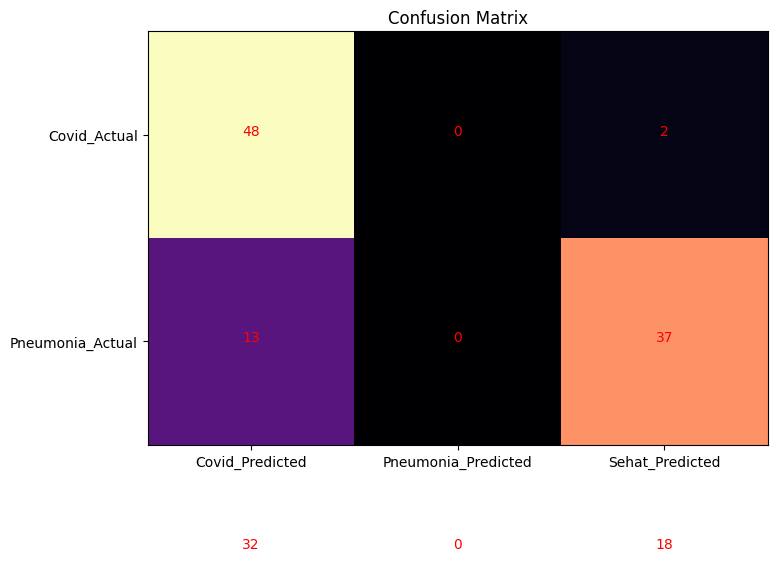

Accuracy: 0.4400
Sensitivity: 0.9600
Specificity: 0.0000


In [18]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred)
total=sum(sum(cm))
acc = (cm[0,0] + cm[1,1] + cm[2,2]) / total
sensitivity = cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
specificity = cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])

# Plot Confusion Matrix
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Covid_Predicted', 'Pneumonia_Predicted', 'Sehat_Predicted'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Covid_Actual', 'Pneumonia_Actual', 'Sehat_Actual'))
ax.set_ylim(1.5, -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i,j], ha='center', color='red')
plt.show()

print("Accuracy: {:.4f}". format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))